In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

from aux import get_idx
from disp import set_font_size

DT = .001
DX = .001

T_MAX = 5
X_MAX = 5

u_on = 1
u_off = 0.

In [ ]:
# spatiotemporal good
v_0_base = 1.1

w_inh = -.5
w_exc = 0 #.5

wdw_u_on = (.5, 1.)
wdw_u_off = (0, .5)

wdw_w_inh = (-.25, .25)
wdw_w_exc = (.25, .75)

fsave = 'ms/2s1a.svg'

In [3]:
def get_u(t):
    
    tmp_a = (wdw_u_on[0] <= t%1) * (t%1 < wdw_u_on[1])
    tmp_b = (wdw_u_on[0] <= t%1-1) * (t%1-1 < wdw_u_on[1])
    
    return u_on * (tmp_a + tmp_b)

def get_w(x):
    
    tmp_a = (wdw_w_inh[0] <= x%1) * (x%1 < wdw_w_inh[1])
    tmp_b = (wdw_w_inh[0] <= x%1-1) * (x%1-1 < wdw_w_inh[1])
    
    inh = w_inh * (tmp_a + tmp_b)
    
    tmp_a = (wdw_w_exc[0] <= x%1) * (x%1 < wdw_w_exc[1])
    tmp_b = (wdw_w_exc[0] <= x%1-1) * (x%1-1 < wdw_w_exc[1])
    
    exc = w_exc * (tmp_a + tmp_b)
    
    return inh + exc

def get_v0(x):
    
    return v_0_base*np.ones(len(x))

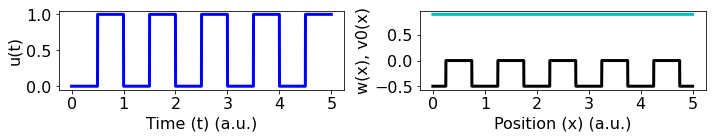

In [4]:
t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)
u = get_u(t)
w = get_w(x)
v0 = get_v0(x)

fig, axs = plt.subplots(1, 2, figsize=(10, 2), tight_layout=True)
axs[0].plot(t, u, lw=3, c='b')
axs[0].set_xlabel('Time (t) (a.u.)')
axs[0].set_ylabel('u(t)')

axs[1].plot(x, w, lw=3, c='k')
axs[1].plot(x, v0, lw=3, c='c')
axs[1].set_xlabel('Position (x) (a.u.)')
axs[1].set_ylabel('w(x), v0(x)')

set_font_size(axs, 16)

In [5]:
v0_mat = np.outer(np.ones(len(t)), v0)
w_mat = np.outer(np.ones(len(t)), w)
u_mat = np.outer(u, np.ones(len(x)))

In [6]:
# funcs for getting nearest value
def u_near(t_):
    return u[get_idx(t_, 0, DT, len(t))]

def w_near(x_):
    return w[get_idx(x_, 0, DX, len(x))]

def v0_near(x_):
    return v0[get_idx(x_, 0, DX, len(x))]

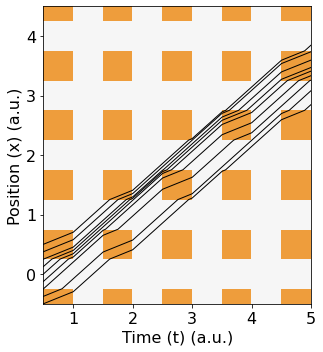

In [7]:
t_0 = .5
x_0s = [0, .125, .25, .375, .5, .625, .75, .875, 1.]

t_smln = np.arange(t_0, t_0 + T_MAX, DT)
x_smlns = []

for x_0 in x_0s:
    x_smln = np.nan * np.zeros(t_smln.shape)
    x_smln[0] = x_0
    for ct, t_ in enumerate(t_smln[1:], 1):
        x_ = x_smln[ct-1]
        v = u_near(t_)*w_near(x_) + v0_near(x_)
        x_smln[ct] = x_ + DT*v
        
    x_smlns.append(x_smln)
    

fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)
ax.matshow(u_mat.T*w_mat.T + v0_mat.T, origin='lower', vmin=(v_0_base - 1), vmax=(v_0_base + 1), cmap='PuOr', extent=[0, T_MAX, -.5, X_MAX-.5])

for cs, x_smln in enumerate(x_smlns):
    ax.plot(t_smln, x_smln - .5, c='k', lw=1)
    
ax.xaxis.tick_bottom()
ax.set_xlim(t_0, T_MAX)
ax.set_ylim(-.5, X_MAX-.5)

ax.set_xlabel('Time (t) (a.u.)')
ax.set_ylabel('Position (x) (a.u.)')

set_font_size(ax, 16)

fig.savefig(fsave)